# Statistics
This notebook performs all the statistical analyses and plotting for this thesis. A Wilcoxon signed-rank test is used to evaluate the p-values. One-sided tests are applied in both directions, depending on the hypothesis being tested.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.lines as mlines

## 1. Alpha, P300, c-VEP against ICA versions
The performances of all individual pipelines are loaded in, this is done for both version (with and without ICA). Following this, the results are plotted, and the p-values are also calculated.

In [2]:
## --- cVEP ---
# Accuracy for c-VEP without ICA
cVEP_results = np.load('/Users/juliette/Desktop/thesis/results/c-VEP/c-VEP_rcca.npz')
cVEP_accuracy = cVEP_results['accuracy'] 

covert_mean_cVEP = cVEP_accuracy[:, 1, :].mean()
cVEP_se = cVEP_results['accuracy_se']
print(f"Average accuracy for covert trials: {covert_mean_cVEP:.3f}")
print(f"Average se for covert trials: {cVEP_se.mean():.3f}")

# Accuracy for c-VEP with ICA
cVEP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/c-VEP/c-VEP_ICA/c-VEP_rcca_ICA.npz')
cVEP_ICA_accuracy = cVEP_ICA_results['accuracy'] 

cVEP_ICA_se = cVEP_ICA_results['accuracy_se']
covert_ICA_mean_cVEP = cVEP_ICA_accuracy[:, 1, :].mean()
print(f"Average accuracy for covert trials and ICA: {covert_ICA_mean_cVEP:.3f}")
print(f"Average se for covert trials and ICA: {cVEP_ICA_se.mean():.3f}")


## --- ALPHA ---
# Accuracy for PSD without ICA
alpha_PSD_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/covert_alpha_PSD_results.npy')
alpha_PSD_sd = alpha_PSD_results['standard_error']
alpha_PSD_accuracy = alpha_PSD_results['accuracy']
alpha_PSD_mean_accuracy = np.round(alpha_PSD_accuracy.mean(), 2)

print(f"Overall LDA accuracy with PSD (covert): {alpha_PSD_mean_accuracy:.2f} ± {alpha_PSD_sd.mean():.2f}")

# Accuracy for CSP without ICA
alpha_CSP_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/covert_alpha_4-comp_CSP_results.npy')

alpha_CSP_sd = alpha_CSP_results['standard_error']
alpha_CSP_accuracy = alpha_CSP_results['accuracy']
alpha_CSP_mean_accuracy = np.round(alpha_CSP_accuracy.mean(), 2)

print(f"Overall LDA accuracy with CSP (covert): {alpha_CSP_mean_accuracy:.2f} ± ± {alpha_CSP_sd.mean():.2f}")

# Accuracy for CSP with ICA
alpha_CSP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/alpha_ICA/covert_alpha_4-comp_CSP_ICA_results.npy')

alpha_CSP_ICA_accuracy = alpha_CSP_ICA_results['accuracy']
alpha_CSP_ICA_sd = alpha_CSP_ICA_results['standard_error']
alpha_CSP_ICA_mean_accuracy = np.round(alpha_CSP_ICA_accuracy.mean(), 2)

print(f"Overall LDA accuracy with CSP and ICA (covert): {alpha_CSP_ICA_mean_accuracy:.2f} ± {alpha_CSP_ICA_sd.mean():.2f}")

# Accuracy for PSD with ICA
alpha_PSD_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/alpha_ICA/covert_alpha_PSD_ICA_results.npy')

alpha_PSD_ICA_accuracy = alpha_PSD_ICA_results['accuracy']
alpha_PSD_ICA_mean_accuracy = np.round(alpha_PSD_ICA_accuracy.mean(), 2)
alpha_PSD_ICA_sd = alpha_PSD_ICA_results['standard_error']

print(f"Overall LDA accuracy with PSD and ICA (covert): {alpha_PSD_ICA_mean_accuracy:.2f} ± {alpha_PSD_ICA_sd.mean():.2f}")

## --- P300 ---
# Accuracy for p300 without ICA
p300_results = np.load('/Users/juliette/Desktop/thesis/results/P300/covert_lda_p300_results.npy')

p300_accuracy = p300_results['correct_trials_mean']
p300_mean_accuracy_ = p300_results[p300_results['subject_id'] == 'Overall']
p300_mean_accuracy = p300_mean_accuracy_['correct_trials_mean'][0]
p300_sd = p300_mean_accuracy_['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300 (covert): {p300_mean_accuracy:.2f} + {p300_sd.mean():.2f}")


# Accurady for p300 with ICA
p300_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/P300/p300_ICA/covert_lda_p300_ICA_results.npy')

p300_ICA_accuracy = p300_ICA_results['correct_trials_mean']
p300_ICA_mean_accuracy_ = p300_ICA_results[p300_ICA_results['subject_id'] == 'Overall']
p300_ICA_mean_accuracy = p300_ICA_mean_accuracy_['correct_trials_mean'][0]
p300_ICA_sd = p300_ICA_mean_accuracy_['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300 and ICA (covert): {p300_ICA_mean_accuracy:.2f} + {p300_ICA_sd:.2f}")



Average accuracy for covert trials: 0.660
Average se for covert trials: 0.020
Average accuracy for covert trials and ICA: 0.661
Average se for covert trials and ICA: 0.020
Overall LDA accuracy with PSD (covert): 0.80 ± 0.04
Overall LDA accuracy with CSP (covert): 0.85 ± ± 0.03
Overall LDA accuracy with CSP and ICA (covert): 0.86 ± 0.03
Overall LDA accuracy with PSD and ICA (covert): 0.81 ± 0.03
Overall LDA accuracy with P300 (covert): 0.97 + 0.00
Overall LDA accuracy with P300 and ICA (covert): 0.98 + 0.00


### Plotting for the individual pipelines (ICA vs. non-ICA)

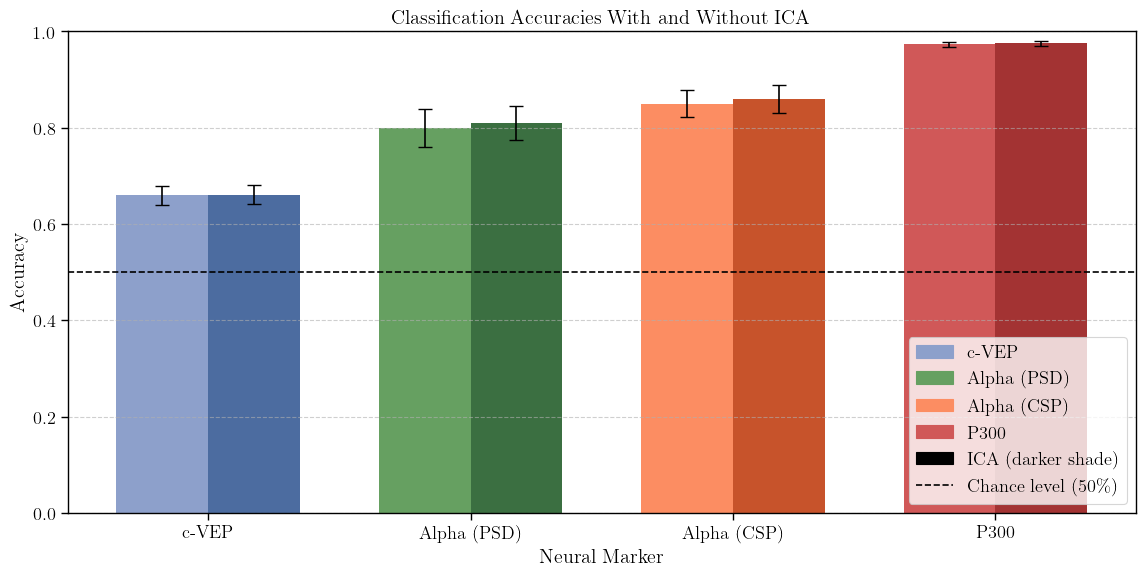

In [3]:
# Accuracy and error values
accuracies = np.array([
    covert_mean_cVEP, covert_ICA_mean_cVEP,
    alpha_PSD_mean_accuracy, alpha_PSD_ICA_mean_accuracy,
    alpha_CSP_mean_accuracy, alpha_CSP_ICA_mean_accuracy,
    p300_mean_accuracy, p300_ICA_mean_accuracy
])
errors = np.array([
    np.mean(cVEP_se), np.mean(cVEP_ICA_se),
    np.mean(alpha_PSD_sd), np.mean(alpha_PSD_ICA_sd),
    np.mean(alpha_CSP_sd), np.mean(alpha_CSP_ICA_sd),
    np.mean(p300_sd), np.mean(p300_ICA_sd)
])

# Grouped labels
marker_labels = ['c-VEP', 'Alpha (PSD)', 'Alpha (CSP)', 'P300']
n_groups = len(marker_labels)

# Organize accuracy and error per group: shape (4, 2) for non-ICA and ICA
accuracies_grouped = accuracies.reshape(n_groups, 2)
errors_grouped = errors.reshape(n_groups, 2)

# Define x positions
x = np.arange(n_groups)
bar_width = 0.35

# Academic muted colors
base_colors = {
    'c-VEP': '#8da0cb',      # Muted Blue
    'Alpha (PSD)': '#66a061',  # Muted Green
    'Alpha (CSP)': '#fc8d62',  # More muted Orange
    'P300': '#d05858'       # Muted Deep Red
}
ica_colors = {
    'c-VEP': '#4c6ca0',      # Dark Blue
    'Alpha (PSD)': '#3b6f41',  # Dark Green
    'Alpha (CSP)': '#c7532b',  # Dark Orange
    'P300': '#a33333'       # Dark Red
}

# Assign colors
colors_non_ica = [base_colors[m] for m in marker_labels]
colors_ica = [ica_colors[m] for m in marker_labels]
sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

bars1 = ax.bar(x - bar_width/2, accuracies_grouped[:, 0], bar_width, yerr=errors_grouped[:, 0],
               label='Without ICA', color=colors_non_ica, capsize=5)
bars2 = ax.bar(x + bar_width/2, accuracies_grouped[:, 1], bar_width, yerr=errors_grouped[:, 1],
               label='With ICA', color=colors_ica, capsize=5)

# Labels and ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neural Marker')
ax.set_title('Classification Accuracies With and Without ICA')
ax.set_xticks(x)
ax.set_xticklabels(marker_labels)
ax.set_ylim(0, 1)
ax.tick_params(axis='y')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Legend
legend_handles = [
    mpatches.Patch(color=base_colors['c-VEP'], label='c-VEP'),
    mpatches.Patch(color=base_colors['Alpha (PSD)'], label='Alpha (PSD)'),
    mpatches.Patch(color=base_colors['Alpha (CSP)'], label='Alpha (CSP)'),
    mpatches.Patch(color=base_colors['P300'], label='P300'),
    mpatches.Patch(color='black', label='ICA (darker shade)'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

]
ax.legend(handles=legend_handles, loc='lower right')
plt.axhline(0.5, linestyle='--', color='black')

# Save
plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/accuracy_comparison_groupedNEW.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


### Computing the p-values comparing ICA vs. non-ICA
The cell below calculates the p-values to test whether the difference in performance is significant. 

In [4]:
# Compare Wilcoxon test for decoding with and without ICA

# -- DIRECTION 1 (non-ICA > ICA) --
# c-VEP decoding
w_stat_cvep, p_value_w_cvep = stats.wilcoxon(cVEP_accuracy[:, 1, :].flatten(), cVEP_ICA_accuracy[:, 1, :].flatten(), alternative='greater')
print(f"Wilcoxon test for c-VEP without vs with ICA (non-ICA > ICA): W={w_stat_cvep:.3f}, p={p_value_w_cvep:.3f}")

# P300 decoding
w_stat_p300, p_value_w_p300 = stats.wilcoxon(p300_accuracy[:-1], p300_ICA_accuracy[:-1], alternative='greater')
print(f"Wilcoxon test for P300 without vs with ICA (non-ICA > ICA): W={w_stat_p300:.3f}, p={p_value_w_p300:.3f}")
    
# Alpha decoding (PSD)
w_stat_psd, p_value_w_psd = stats.wilcoxon(alpha_PSD_accuracy.flatten(), alpha_PSD_ICA_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for PSD without vs with ICA (non-ICA > ICA): W={w_stat_psd:.3f}, p={p_value_w_psd:.3f}")

# Alpha decoding (CSP)
w_stat_csp, p_value_w_csp = stats.wilcoxon(alpha_CSP_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for CSP without vs with ICA (non-ICA > ICA): W={w_stat_csp:.3f}, p={p_value_w_csp:.3f}")

# -- DIRECTION 2 (ICA > non-ICA) --
# c-VEP decoding
w_stat_cvep, p_value_w_cvep = stats.wilcoxon(cVEP_accuracy[:, 1, :].flatten(), cVEP_ICA_accuracy[:, 1, :].flatten(), alternative='less')
print(f"Wilcoxon test for c-VEP without vs with ICA (ICA > non-ICA): W={w_stat_cvep:.3f}, p={p_value_w_cvep:.3f}")

# P300 decoding
w_stat_p300, p_value_w_p300 = stats.wilcoxon(p300_accuracy[:-1], p300_ICA_accuracy[:-1], alternative='less')
print(f"Wilcoxon test for P300 without vs with ICA (ICA > non-ICA): W={w_stat_p300:.3f}, p={p_value_w_p300:.3f}")
    
# Alpha decoding (PSD)
w_stat_psd, p_value_w_psd = stats.wilcoxon(alpha_PSD_accuracy.flatten(), alpha_PSD_ICA_accuracy.flatten(), alternative='less')
print(f"Wilcoxon test for PSD without vs with ICA (ICA > non-ICA): W={w_stat_psd:.3f}, p={p_value_w_psd:.3f}")

# Alpha decoding (CSP)
w_stat_csp, p_value_w_csp = stats.wilcoxon(alpha_CSP_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='less')
print(f"Wilcoxon test for CSP without vs with ICA (ICA > non-ICA): W={w_stat_csp:.3f}, p={p_value_w_csp:.3f}")

Wilcoxon test for c-VEP without vs with ICA (non-ICA > ICA): W=851.000, p=0.684
Wilcoxon test for P300 without vs with ICA (non-ICA > ICA): W=76.000, p=0.662
Wilcoxon test for PSD without vs with ICA (non-ICA > ICA): W=61.500, p=0.948
Wilcoxon test for CSP without vs with ICA (non-ICA > ICA): W=50.000, p=0.825
Wilcoxon test for c-VEP without vs with ICA (ICA > non-ICA): W=851.000, p=0.316
Wilcoxon test for P300 without vs with ICA (ICA > non-ICA): W=76.000, p=0.338
Wilcoxon test for PSD without vs with ICA (ICA > non-ICA): W=61.500, p=0.052
Wilcoxon test for CSP without vs with ICA (ICA > non-ICA): W=50.000, p=0.175


## 1.2. CSP against PSD alpha
The cell below tests whether the differences between PSD and CSP are significant for alpha.

In [5]:
# Comparison of alpha decoding with PSD and CSP

# -- Direction 1 (PSD > CSP) --
w_stat_psd, p_value_w_psd = stats.wilcoxon(alpha_PSD_accuracy.flatten(), alpha_CSP_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for PSD against CSP (PSD > CSP) : W={w_stat_psd:.3f}, p={p_value_w_psd:.3f}")

w_stat_psd_ICA, p_value_w_psd_ICA = stats.wilcoxon(alpha_PSD_ICA_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for PSD against CSP both with ICA (PSD > CSP) : W={w_stat_psd_ICA:.3f}, p={p_value_w_psd_ICA:.3f}")


# -- Direction 2 (CSP > PSD) --
w_stat_psd, p_value_w_psd = stats.wilcoxon(alpha_PSD_accuracy.flatten(), alpha_CSP_accuracy.flatten(), alternative='less')
print(f"Wilcoxon test for PSD against CSP (CSP > PSD) : W={w_stat_psd:.3f}, p={p_value_w_psd:.3f}")

w_stat_psd_ICA, p_value_w_psd_ICA = stats.wilcoxon(alpha_PSD_ICA_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='less')
print(f"Wilcoxon test for PSD against CSP both with ICA (CSP > PSD) : W={w_stat_psd_ICA:.3f}, p={p_value_w_psd_ICA:.3f}")

Wilcoxon test for PSD against CSP (PSD > CSP) : W=85.500, p=0.996
Wilcoxon test for PSD against CSP both with ICA (PSD > CSP) : W=91.000, p=0.991
Wilcoxon test for PSD against CSP (CSP > PSD) : W=85.500, p=0.004
Wilcoxon test for PSD against CSP both with ICA (CSP > PSD) : W=91.000, p=0.009


### Visualization of CSP against PSD alpha

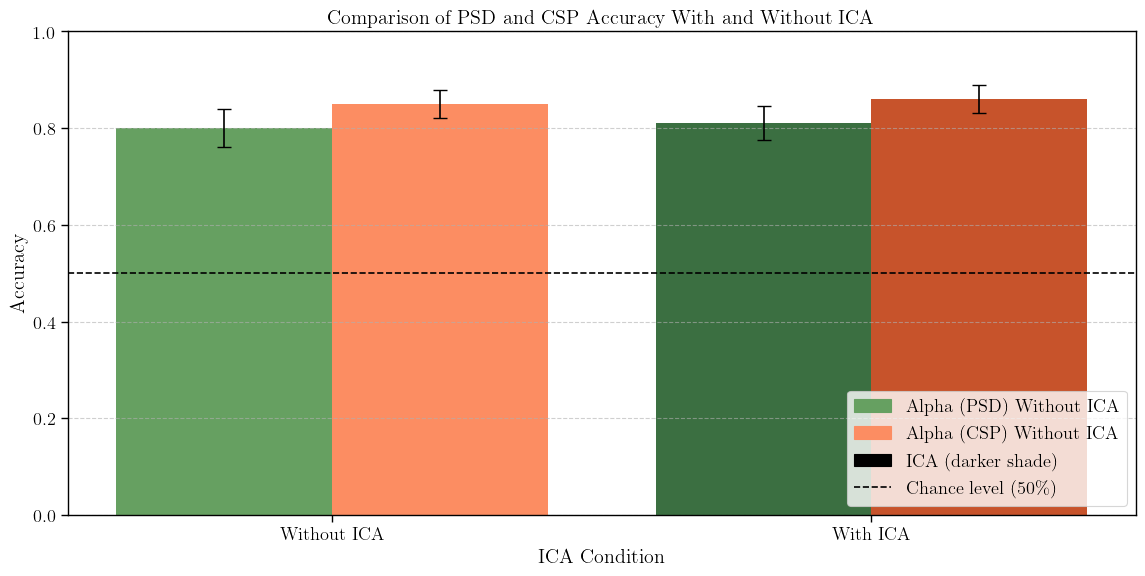

In [6]:
# Accuracy and error values for PSD and CSP, without ICA and with ICA
accuracies = np.array([
    alpha_PSD_mean_accuracy, alpha_CSP_mean_accuracy,  # Without ICA
    alpha_PSD_ICA_mean_accuracy, alpha_CSP_ICA_mean_accuracy  # With ICA
])
errors = np.array([
    np.mean(alpha_PSD_sd), np.mean(alpha_CSP_sd),
    np.mean(alpha_PSD_ICA_sd), np.mean(alpha_CSP_ICA_sd),
])

# We want 2 groups (ICA conditions):
group_labels = ['Without ICA', 'With ICA']
n_markers = 2  # PSD and CSP

# Reshape accuracies and errors to shape (2 ICA groups, 2 markers each)
accuracies_grouped = accuracies.reshape(2, n_markers)
errors_grouped = errors.reshape(2, n_markers)

# X positions for the 2 groups on the x-axis
x = np.arange(len(group_labels))
group_width = 0.8  # total width reserved for each ICA group
bar_width = group_width / n_markers  # width of each bar inside the group

# Base colors for PSD and CSP (without ICA)
base_colors = ['#66a061', '#fc8d62']  # PSD green, CSP orange

# Slightly darker colors for ICA (darker shade of base colors)
ica_colors = ['#3b6f41', '#c7532b']

sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

for i in range(n_markers):
    # Bars for "Without ICA" group (lighter color)
    ax.bar(x[0] - group_width/2 + i * bar_width + bar_width/2, 
           accuracies_grouped[0, i], width=bar_width, yerr=errors_grouped[0, i],
           color=base_colors[i], capsize=5, label=f'Alpha {"PSD" if i == 0 else "CSP"} (Without ICA)' if i == 0 else "")
    
    # Bars for "With ICA" group (darker color)
    ax.bar(x[1] - group_width/2 + i * bar_width + bar_width/2, 
           accuracies_grouped[1, i], width=bar_width, yerr=errors_grouped[1, i],
           color=ica_colors[i], capsize=5, label=f'Alpha {"PSD" if i == 0 else "CSP"} (With ICA)' if i == 0 else "")

# Labels and axes
ax.set_ylabel('Accuracy')
ax.set_xlabel('ICA Condition')
ax.set_title('Comparison of PSD and CSP Accuracy With and Without ICA')
ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.tick_params(axis='y')

# Custom legend to distinguish colors and ICA status
legend_handles = [
    mpatches.Patch(color=base_colors[0], label='Alpha (PSD) Without ICA'),
    mpatches.Patch(color=base_colors[1], label='Alpha (CSP) Without ICA'),
    mpatches.Patch(color='black', label='ICA (darker shade)'),
    mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

    
    
]
 
plt.axhline(0.5, linestyle='--', color='black')
ax.legend(handles=legend_handles, loc='lower right')

plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/csp_vs_psd_grouped.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


## 2. sLDA against BT-LDA
For both alpha conditions (PSD and CSP) and P300, experiments are done to examine the differences between sLDA and BT-LDA. The results are shown below, together with visualizations.

In [7]:
# --- P300 ---
# Accurady for p300 with ICA and BT-LDA
p300_ICA_TP_results = np.load('/Users/juliette/Desktop/thesis/results/P300/p300_ICA/covert_toeplitzLDA_p300_ICA_results.npy')

p300_ICA_TP_accuracy = p300_ICA_TP_results['correct_trials_mean']
p300_ICA_TP_mean_accuracy = p300_ICA_TP_results[p300_ICA_TP_results['subject_id'] == 'Overall']
overall_accuracy_mean = p300_ICA_TP_mean_accuracy['correct_trials_mean'][0]
p300_ICA_TP_sd = p300_ICA_TP_mean_accuracy['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300, ICA, and BT-LDA (covert): {overall_accuracy_mean:.2f} +_ {p300_ICA_TP_sd:.2f}")

# --- Alpha ---
# Accuracy for PSD with ICA and BT-LDA
alpha_PSD_TP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/covert_alpha_PSD_BLT_ICA_results.npy')

alpha_PSD_TP_ICA_accuracy = alpha_PSD_TP_ICA_results['accuracy']
alpha_PSD_TP_ICA_mean_accuracy = np.round(alpha_PSD_TP_ICA_accuracy.mean(), 2)
alpha_PSD_TP_ICA_sd = alpha_PSD_TP_ICA_results['standard_error'].mean()

print(f"Overall LDA accuracy with PSD, ICA and BT-LDA (covert): {alpha_PSD_TP_ICA_mean_accuracy:.2f} +- {alpha_PSD_TP_ICA_sd:.2f}")

# Accuracy for CSP with ICA and BT-LDA
alpha_CSP_TP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/alpha_ICA/covert_alpha_4-comp_CSP_BLT_ICA_results.npy')

alpha_CSP_TP_ICA_accuracy = alpha_CSP_TP_ICA_results['accuracy']
alpha_CSP_TP_ICA_mean_accuracy = np.round(alpha_CSP_TP_ICA_accuracy.mean(), 2)
alpha_CSP_TP_ICA_sd = alpha_CSP_TP_ICA_results['standard_error'].mean()

print(f"Overall LDA accuracy with CSP, ICA and BT-LDA (covert): {alpha_CSP_TP_ICA_mean_accuracy:.2f} +- {alpha_CSP_TP_ICA_sd:.2f}")

Overall LDA accuracy with P300, ICA, and BT-LDA (covert): 0.98 +_ 0.00
Overall LDA accuracy with PSD, ICA and BT-LDA (covert): 0.83 +- 0.03
Overall LDA accuracy with CSP, ICA and BT-LDA (covert): 0.85 +- 0.03


### Visualization

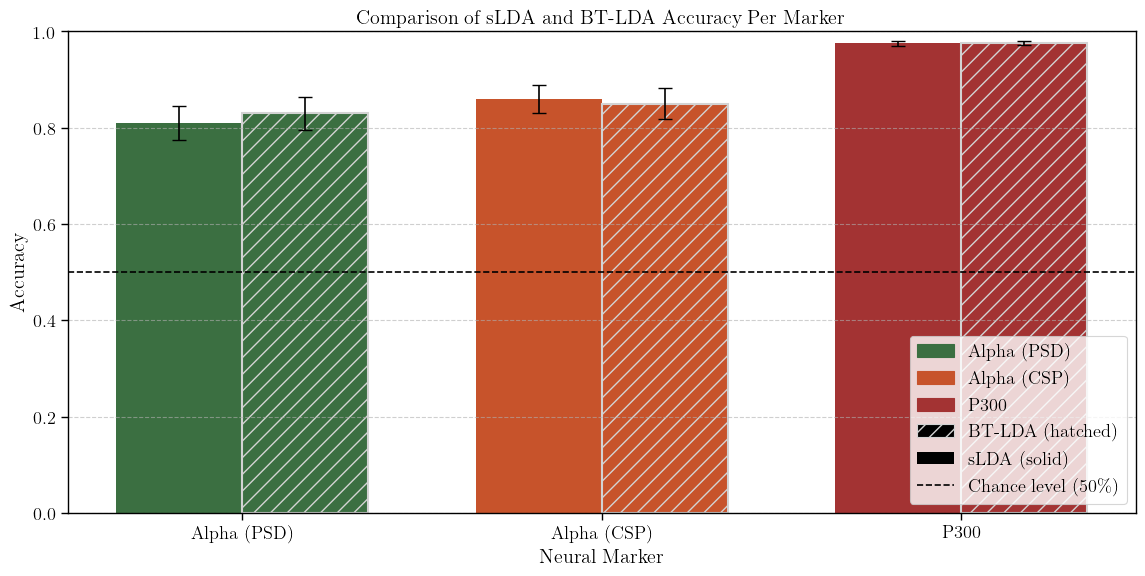

In [8]:
# Accuracy and error values
accuracies = np.array([
    alpha_PSD_ICA_mean_accuracy, alpha_PSD_TP_ICA_mean_accuracy,
    alpha_CSP_ICA_mean_accuracy, alpha_CSP_TP_ICA_mean_accuracy,
    p300_ICA_mean_accuracy, overall_accuracy_mean
])
errors = np.array([
    np.mean(alpha_PSD_ICA_sd), np.mean(alpha_PSD_TP_ICA_sd),
    np.mean(alpha_CSP_ICA_sd), np.mean(alpha_CSP_TP_ICA_sd),
    p300_ICA_sd, p300_ICA_TP_sd
])

# Group labels and colors
marker_labels = ['Alpha (PSD)', 'Alpha (CSP)', 'P300']
n_groups = len(marker_labels)

# Organize into shape (3 markers, 2 methods: sLDA, BT-LDA)
accuracies_grouped = accuracies.reshape(n_groups, 2)
errors_grouped = errors.reshape(n_groups, 2)

x = np.arange(n_groups)
bar_width = 0.35

# Academic dark colors
dark_colors = {
    'Alpha (PSD)': '#3b6f41',  # Dark Green
    'Alpha (CSP)': '#c7532b',  # Dark Orange
    'P300': '#a33333'          # Dark Red
}

colors_slda = [dark_colors[label] for label in marker_labels]

sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

# Plot sLDA bars (solid)
for i in range(n_groups):
    ax.bar(x[i] - bar_width / 2, accuracies_grouped[i, 0], bar_width,
           yerr=errors_grouped[i, 0], color=colors_slda[i], capsize=5, label='sLDA' if i == 0 else "")

# Plot BT-LDA bars (hatched with lightgray hatch color)
for i in range(n_groups):
    rect = mpatches.Rectangle(
        (x[i] + bar_width / 2 - bar_width / 2, 0),
        width=bar_width,
        height=accuracies_grouped[i, 1],
        facecolor=colors_slda[i],
        edgecolor='lightgray',
        hatch='//',
        linewidth=1.5
    )
    ax.add_patch(rect)
    ax.errorbar(x[i] + bar_width / 2, accuracies_grouped[i, 1],
                yerr=errors_grouped[i, 1], fmt='none', ecolor='black', capsize=5)

# Axes labels and appearance
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neural Marker')
ax.set_title('Comparison of sLDA and BT-LDA Accuracy Per Marker')
ax.set_xticks(x)
ax.set_xticklabels(marker_labels)
ax.set_ylim(0, 1)
ax.tick_params(axis='y')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Legend
legend_handles = [
    mpatches.Patch(color=dark_colors['Alpha (PSD)'], label='Alpha (PSD)'),
    mpatches.Patch(color=dark_colors['Alpha (CSP)'], label='Alpha (CSP)'),
    mpatches.Patch(color=dark_colors['P300'], label='P300'),
    mpatches.Patch(facecolor='black', edgecolor='lightgray', hatch='//', label='BT-LDA (hatched)'),
    mpatches.Patch(facecolor='black', label='sLDA (solid)'),
            mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

]
ax.legend(handles=legend_handles, loc='lower right')

plt.axhline(0.5, linestyle='--', color='black')

# Save and show
plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/btlda_vs_slda_grouped.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


### Calculate p-values

In [10]:
# -- Direction 1 (sLDA > BT-LDA) --

# --- P300 ---
W_p300, p_p300 = stats.wilcoxon(p300_ICA_accuracy[:-1], p300_ICA_TP_accuracy[:-1], alternative='greater') # Exclude the last entry: overall accuracy
print(f"P300 (sLDA > BT-LDA): W={W_p300:.3f}, p={p_p300:.3f}")

# --- PSD (alpha) ---
W_psd, p_psd = stats.wilcoxon(alpha_PSD_ICA_accuracy.flatten(), alpha_PSD_TP_ICA_accuracy.flatten(), alternative='greater')
print(f"Alpha PSD (sLDA > BT-LDA): W={W_psd:.3f}, p={p_psd:.3f}")

# --- CSP (alpha) ---
W_csp, p_csp = stats.wilcoxon(alpha_CSP_ICA_accuracy.flatten(), alpha_CSP_TP_ICA_accuracy.flatten(), alternative='greater')
print(f"Alpha CSP (sLDA > BT-LDA): W={W_csp:.3f}, p={p_csp:.3f}")

# -- Direction 2 (BT-LDA > sLDA) --

# --- P300 ---
W_p300, p_p300 = stats.wilcoxon(p300_ICA_accuracy[:-1], p300_ICA_TP_accuracy[:-1], alternative='less') # Exclude the last entry: overall accuracy
print(f"P300 (BT-LDA > sLDA): W={W_p300:.3f}, p={p_p300:.3f}")

# --- PSD (alpha) ---
W_psd, p_psd = stats.wilcoxon(alpha_PSD_ICA_accuracy.flatten(), alpha_PSD_TP_ICA_accuracy.flatten(), alternative='less')
print(f"Alpha PSD (BT-LDA > sLDA): W={W_psd:.3f}, p={p_psd:.3f}")

# --- CSP (alpha) ---
W_csp, p_csp = stats.wilcoxon(alpha_CSP_ICA_accuracy.flatten(), alpha_CSP_TP_ICA_accuracy.flatten(), alternative='less')
print(f"Alpha CSP (BT-LDA > sLDA): W={W_csp:.3f}, p={p_csp:.3f}")


P300 (sLDA > BT-LDA): W=45.500, p=0.671
Alpha PSD (sLDA > BT-LDA): W=86.500, p=0.965
Alpha CSP (sLDA > BT-LDA): W=137.500, p=0.108
P300 (BT-LDA > sLDA): W=45.500, p=0.329
Alpha PSD (BT-LDA > sLDA): W=86.500, p=0.035
Alpha CSP (BT-LDA > sLDA): W=137.500, p=0.892


## 3. Compare all individual pipelines
Now all the individual pipelines are compared to each other in terms of accuracy.

In [11]:
# -- Direction 1 --

# Compare P300+BT-LDA against CSP alpha (both ICA)
w_alpha_p300_compare, p_value_alpha_p300_compare = stats.wilcoxon(alpha_CSP_ICA_accuracy.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='greater')
print(f"Wilcoxon test for P300 against alpha with ICA (alpha > P300): W={w_alpha_p300_compare:.3f}, p={p_value_alpha_p300_compare:.3f}")

# Secondly, compare P300+BT-LDA against c-VEP (both ICA)
cVEP_ICA_mean_accuracy = cVEP_ICA_accuracy[:, 1, :].mean(axis=1)
w_cvep_p300_compare, p_value_cvep_p300_compare = stats.wilcoxon(cVEP_ICA_mean_accuracy.flatten(), p300_ICA_TP_accuracy.flatten()[:-1],alternative='greater')
print(f"Wilcoxon test for P300 against c-VEP both with ICA and BT-LDA (c-VEP > P300): W={w_cvep_p300_compare:.3f}, p={p_value_cvep_p300_compare:.3f}")

# Thirdly compare CSPalpha against c-VEP (both ICA)
w_alpha_cvep_compare, p_value_alpha_cvep_compare = stats.wilcoxon(cVEP_ICA_mean_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for c-VEP against alpha, both with ICA (c-VEP > alpha): W={w_alpha_cvep_compare:.3f}, p={p_value_alpha_cvep_compare:.3f}")

# -- Direction 2 --

# Compare P300+BT-LDA against CSP alpha (both ICA)
w_alpha_p300_compare, p_value_alpha_p300_compare = stats.wilcoxon(alpha_CSP_ICA_accuracy.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='less')
print(f"Wilcoxon test for P300 against alpha with ICA (P300 > alpha): W={w_alpha_p300_compare:.3f}, p={p_value_alpha_p300_compare:.3f}")

# Secondly, compare P300+BT-LDA against c-VEP (both ICA)
cVEP_ICA_mean_accuracy = cVEP_ICA_accuracy[:, 1, :].mean(axis=1)
w_cvep_p300_compare, p_value_cvep_p300_compare = stats.wilcoxon(cVEP_ICA_mean_accuracy.flatten(), p300_ICA_TP_accuracy.flatten()[:-1],alternative='less')
print(f"Wilcoxon test for P300 against c-VEP both with ICA and BT-LDA (P300 > c-VEP): W={w_cvep_p300_compare:.3f}, p={p_value_cvep_p300_compare:.3f}")

# Thirdly compare CSPalpha against c-VEP (both ICA)
w_alpha_cvep_compare, p_value_alpha_cvep_compare = stats.wilcoxon(cVEP_ICA_mean_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='less')
print(f"Wilcoxon test for c-VEP against alpha, both with ICA (alpha > c-VEP): W={w_alpha_cvep_compare:.3f}, p={p_value_alpha_cvep_compare:.3f}")

Wilcoxon test for P300 against alpha with ICA (alpha > P300): W=42.000, p=1.000
Wilcoxon test for P300 against c-VEP both with ICA and BT-LDA (c-VEP > P300): W=0.000, p=1.000
Wilcoxon test for c-VEP against alpha, both with ICA (c-VEP > alpha): W=35.000, p=1.000
Wilcoxon test for P300 against alpha with ICA (P300 > alpha): W=42.000, p=0.000
Wilcoxon test for P300 against c-VEP both with ICA and BT-LDA (P300 > c-VEP): W=0.000, p=0.000
Wilcoxon test for c-VEP against alpha, both with ICA (alpha > c-VEP): W=35.000, p=0.000


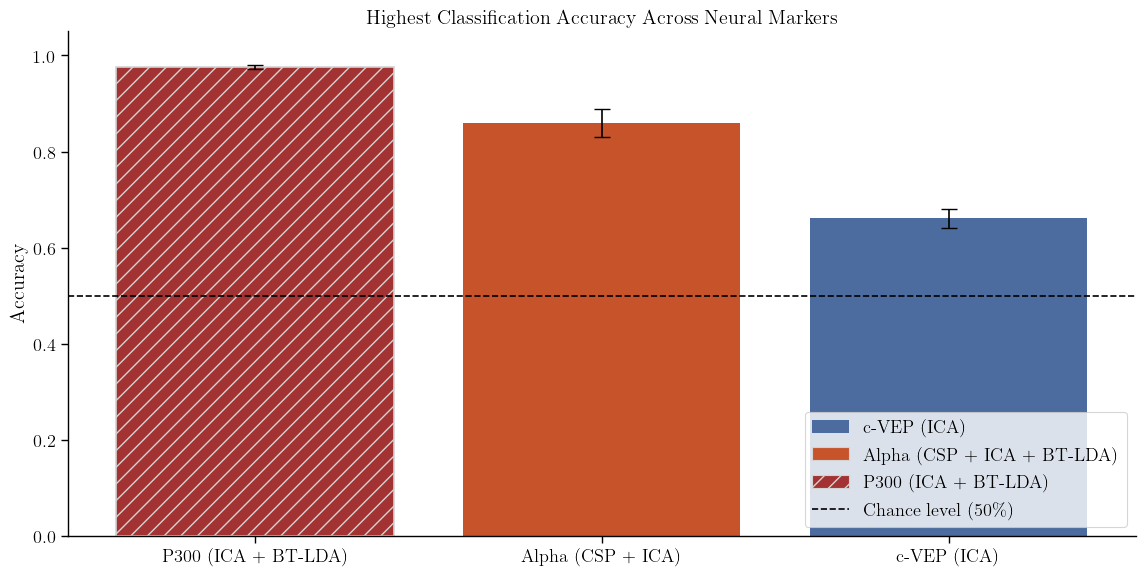

In [12]:
# Your actual values
group_1_accuracies = [
    p300_ICA_TP_mean_accuracy['correct_trials_mean'][0],
    np.mean(alpha_CSP_ICA_mean_accuracy),
    np.mean(covert_ICA_mean_cVEP)
]

group_1_se = [
    np.mean(p300_ICA_TP_sd),
    np.mean(alpha_CSP_ICA_sd),
    np.mean(cVEP_ICA_se)
]

labels = ['P300 (ICA + BT-LDA)', 'Alpha (CSP + ICA)', 'c-VEP (ICA)']
x = np.arange(len(labels))

# Define base colors
base_colors = {
    'P300 (ICA + BT-LDA)': '#a33333',            # Dark Red
    'Alpha (CSP + ICA)': '#c7532b',     # Dark Orange
    'c-VEP (ICA)': '#4c6ca0'            # Muted Blue
}

colors = [base_colors[label] for label in labels]

# Bigger figure
sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

bars = []
for i, label in enumerate(labels):
    if 'P300' in label:
        bar = ax.bar(x[i], group_1_accuracies[i], yerr=group_1_se[i], capsize=6,
                     color=colors[i], edgecolor='lightgray', linewidth=1.2, hatch='//')
    else:
        bar = ax.bar(x[i], group_1_accuracies[i], yerr=group_1_se[i], capsize=6,
                     color=colors[i])
    bars.append(bar)

# Styling
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Highest Classification Accuracy Across Neural Markers')
ax.spines[['top', 'right']].set_visible(False)

# Legend
legend_handles = [
    mpatches.Patch(facecolor=base_colors['c-VEP (ICA)'], label='c-VEP (ICA)'),
    mpatches.Patch(facecolor=base_colors['Alpha (CSP + ICA)'], edgecolor='lightgray', label='Alpha (CSP + ICA + BT-LDA)'),
    mpatches.Patch(facecolor=base_colors['P300 (ICA + BT-LDA)'], edgecolor='lightgray', hatch='//', label='P300 (ICA + BT-LDA)'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

]
ax.legend(handles=legend_handles, loc='lower right')
plt.axhline(0.5, linestyle='--', color='black')


plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/individual_comparisons.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


## 4. Hybrid comparison
This is the last section of this notebook and it contains the hybrid comparisons. First, the data is loaded in, then the p-values are calculated and finally, a visualization is made.

In [13]:
# -- Full hybrid -- 
results_hybrid = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+p300+c-vep/cvep_p300_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_hybrid = results_hybrid['accuracy']      # shape: (n_subjects, n_folds)
stds_hybrid = results_hybrid['std']                 # shape: (n_subjects,)
average_accuracies_hybrid = np.mean(accuracies_hybrid, axis=1)
print(f"Average accuracy of full hybrid is {average_accuracies_hybrid.mean():.2f} ± {stds_hybrid.mean():.2f}")

# -- Pairwise (alpha + c-VEP) --
results_pair_ac = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+c-vep/cvep_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_ac = results_pair_ac['accuracy']
stds_ac = results_pair_ac['std']
average_accuracies_ac = np.mean(accuracies_ac, axis=1)
print(f"Average accuracy of alpha+c-VEP is {average_accuracies_ac.mean():.2f} ± {stds_ac.mean():.2f}")

# -- Pairwise (alpha + p300) -- 
results_pair_ap = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+p300/p300_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_ap = results_pair_ap['accuracy']
stds_ap = results_pair_ap['std']
average_accuracies_ap = np.mean(accuracies_ap, axis=1)
print(f"Average accuracy of alpha+p300 is {average_accuracies_ap.mean():.2f} ± {stds_ap.mean():.2f}")

# -- Pairwise (p300 + c-VEP) --
results_pair_pc = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/p300+cvep/p300_cvep_hybrid_accuracy_results.npz')

# Access the data
accuracies_pc = results_pair_pc['accuracy']
stds_pc = results_pair_pc['std']
average_accuracies_pc = np.mean(accuracies_pc, axis=1)
print(f"Average accuracy of c-VEP+p300 is {average_accuracies_pc.mean():.2f} ± {stds_pc.mean():.2f}")

Average accuracy of full hybrid is 0.95 ± 0.03
Average accuracy of alpha+c-VEP is 0.94 ± 0.04
Average accuracy of alpha+p300 is 0.91 ± 0.04
Average accuracy of c-VEP+p300 is 0.81 ± 0.07


In [14]:
# --- P300 ---
# Accurady for p300 with ICA and BlockToeplitz
p300_ICA_TP_results = np.load('/Users/juliette/Desktop/thesis/results/P300/p300_ICA/covert_toeplitzLDA_p300_ICA_results.npy')

p300_ICA_TP_accuracy = p300_ICA_TP_results['correct_trials_mean']
p300_ICA_TP_mean_accuracy = p300_ICA_TP_results[p300_ICA_TP_results['subject_id'] == 'Overall']
overall_accuracy_mean = p300_ICA_TP_mean_accuracy['correct_trials_mean'][0]
p300_ICA_TP_sd = p300_ICA_TP_mean_accuracy['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300, ICA, and BlockToeplitz LDA (covert): {overall_accuracy_mean:.2f} +_ {p300_ICA_TP_sd:.2f}")

# Firstly, compare full hybrid against best performing pairwise (alpha+c-VEP)
w_hybrid_compare, p_value_hybrid_compare = stats.wilcoxon(average_accuracies_hybrid.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='less')
print(f"Wilcoxon test for full hybrid against P300 and BT-LDA: W={w_hybrid_compare:.3f}, p={p_value_hybrid_compare:.3f}")

# Secondly, compare alpha+c-VEP against alpha (CSP+ICA)
w_ac_compare, p_value_ac_compare = stats.wilcoxon(average_accuracies_ac.flatten(), alpha_CSP_ICA_accuracy.flatten(),alternative='greater')
print(f"Wilcoxon test for alpha+c-VEP against alpha (CSP+ICA): W={w_ac_compare:.3f}, p={p_value_ac_compare:.3f}")

# Thirdly, compare alpha+p300 against p300 (ICA)
w_ap_compare, p_value_ap_compare = stats.wilcoxon(average_accuracies_ap.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='greater')
print(f"Wilcoxon test for alpha+p300 against P300 (ICA): W={w_ap_compare:.3f}, p={p_value_ap_compare:.3f}")

# Finally, compare p300+c-VEP against P300(ICA)
w_pc_compare, p_value_pc_compare = stats.wilcoxon(average_accuracies_pc.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='greater')
print(f"Wilcoxon test for p300+c-VEP against P300 (ICA): W={w_pc_compare:.3f}, p={p_value_pc_compare:.3f}")

Overall LDA accuracy with P300, ICA, and BlockToeplitz LDA (covert): 0.98 +_ 0.00
Wilcoxon test for full hybrid against P300 and BT-LDA: W=104.500, p=0.021
Wilcoxon test for alpha+c-VEP against alpha (CSP+ICA): W=318.000, p=0.000
Wilcoxon test for alpha+p300 against P300 (ICA): W=76.000, p=0.998
Wilcoxon test for p300+c-VEP against P300 (ICA): W=0.000, p=1.000


### Visualization

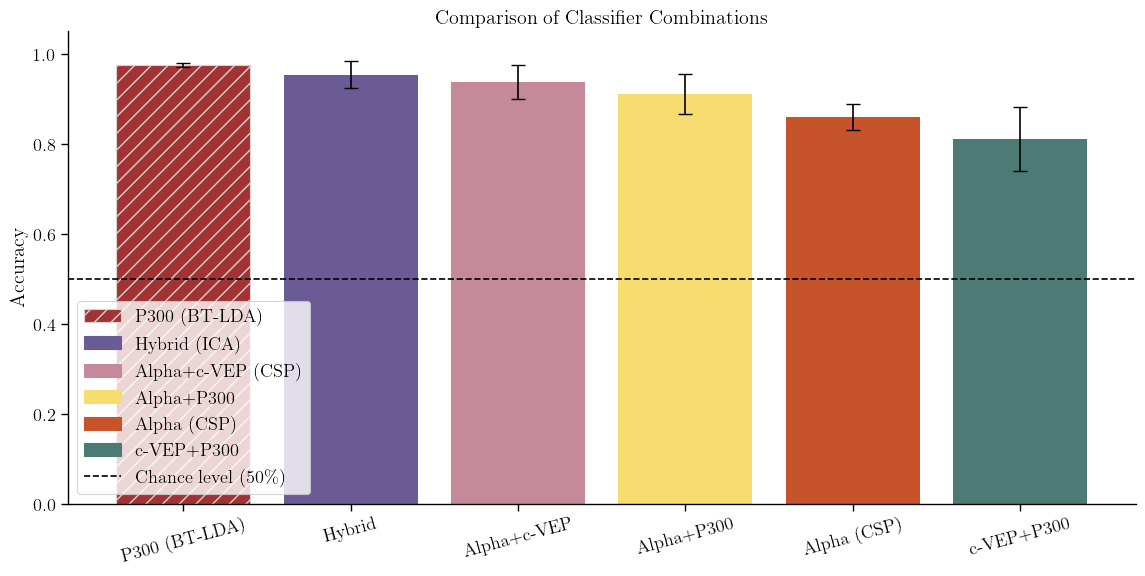

In [15]:

# Reordered values
all_accuracies = np.array([
    overall_accuracy_mean,                  # P300 (BT-LDA)
    np.mean(average_accuracies_hybrid),     # Hybrid
    np.mean(average_accuracies_ac),         # Alpha+c-VEP
    np.mean(average_accuracies_ap),         # Alpha+P300
    np.mean(alpha_CSP_ICA_mean_accuracy),   # Alpha (CSP)
    np.mean(average_accuracies_pc)          # P300+c-VEP
])

all_se = np.array([
    np.mean(p300_ICA_TP_sd),               # P300 (BT-LDA)
    np.mean(stds_hybrid),                  # Hybrid
    np.mean(stds_ac),                      # Alpha+c-VEP
    np.mean(stds_ap),                      # Alpha+P300
    np.mean(alpha_CSP_ICA_sd),             # Alpha (CSP)
    np.mean(stds_pc)                       # P300+c-VEP
])

labels = [
    'P300 (BT-LDA)',
    'Hybrid',
    'Alpha+c-VEP',
    'Alpha+P300',
    'Alpha (CSP)',
    'c-VEP+P300'
]

bar_colors = [
    '#a33333',  # P300 (BT-LDA)
    '#6B5B95',  # Hybrid
    '#C48A99',  # Alpha+c-VEP
    '#f7dc6f',  # Alpha+P300
    '#c7532b',  # Alpha (CSP)
    '#4C7A75'   # c-VEP+P300
]

x = np.arange(len(labels))
width = 0.8

# Plot styling
sns.set_context("paper", font_scale=1.5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(11.69, 6))

for i in range(len(x)):
    hatch = '//' if labels[i] == 'P300 (BT-LDA)' else None
    edgecolor = 'lightgrey' if hatch else None

    ax.bar(x[i], all_accuracies[i], width=width, yerr=all_se[i],
           capsize=5, color=bar_colors[i], hatch=hatch, edgecolor=edgecolor)

# Formatting
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.set_title('Comparison of Classifier Combinations')
ax.spines[['top', 'right']].set_visible(False)

# Chance level line
plt.axhline(0.5, linestyle='--', color='black')

# Legend
legend_handles = [
    mpatches.Patch(facecolor='#a33333', edgecolor='lightgrey', hatch='//', label='P300 (BT-LDA)'),
    mpatches.Patch(color='#6B5B95', label='Hybrid (ICA)'),
    mpatches.Patch(color='#C48A99', label='Alpha+c-VEP (CSP)'),
    mpatches.Patch(color='#f7dc6f', label='Alpha+P300'),
    mpatches.Patch(color='#c7532b', label='Alpha (CSP)'),
    mpatches.Patch(color='#4C7A75', label='c-VEP+P300'),
    mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\\%)')
]
ax.legend(handles=legend_handles, loc='lower left')

plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/hierarchical_comparison_colored.png',
            bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()
